# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

%md
#Problem Statement: E-news Express found less number of subscribers reduced this year compare to last year.The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Objectives: 
* Find amount of time users spends on new page.
* Check the conversion rate based on users language.
* Find out the effectiveness of new deign_web page.
* Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [47]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__


'1.10.1'

In [48]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [49]:
enews = pd.read_csv('abtest.csv')
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [50]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [51]:
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [52]:
enews.shape

(100, 6)

In [53]:
enews.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [54]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [55]:
# Check missing values.
enews.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset.

In [56]:
enews.duplicated().sum()

0

There are no duplicate values in teh dataset.

In [57]:
enews.duplicated().count()

100

### Categorical variables stat

In [58]:
import pandas as pd
# Create contingency table for Preferred Language and Converted Status
cont_table = pd.crosstab(enews['language_preferred'], enews['converted'])

# Display the contingency table
print(cont_table)

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


In [59]:
# Create contingency table for group and Converted Status
cont_table = pd.crosstab(enews['group'], enews['converted'])

# Display the contingency table
print(cont_table)

converted  no  yes
group             
control    29   21
treatment  17   33


### Univariate Analysis

Time spend by user on the landing page?
Conversion rate?
Preferd language users?

In [60]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [61]:
dfold = enews[enews['landing_page'] == 'old']
dfold.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


In [62]:
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [63]:

dfnew = enews[enews['landing_page'] == 'new']
dfnew.describe()


,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


In [64]:
# Mean time spent on the old and new page
enews.groupby(['landing_page']).time_spent_on_the_page.mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

# Time spent on the page

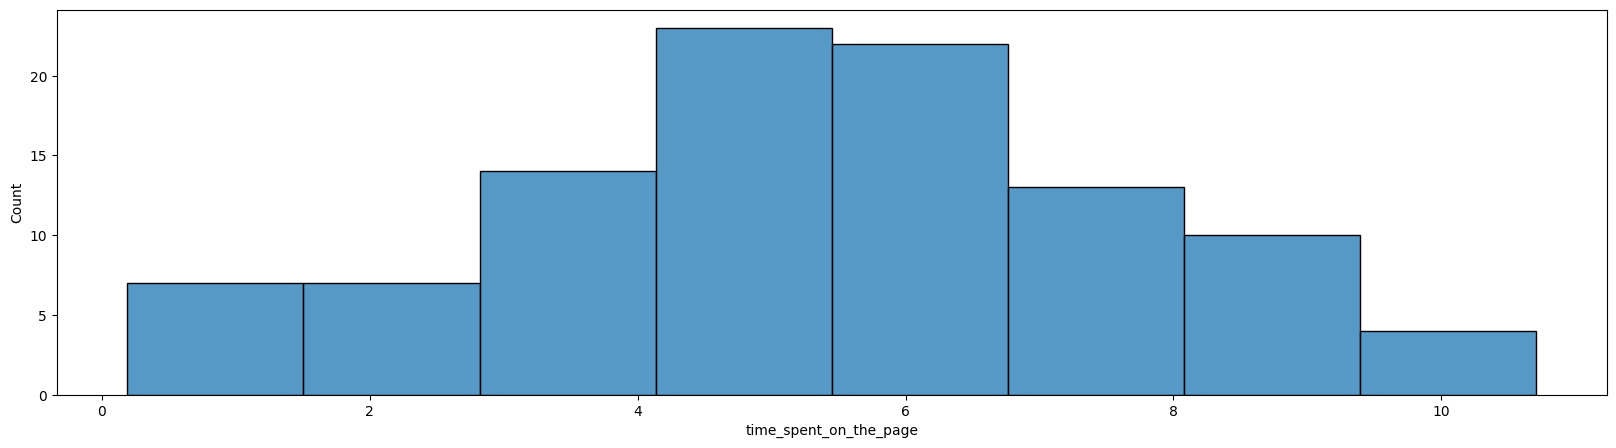

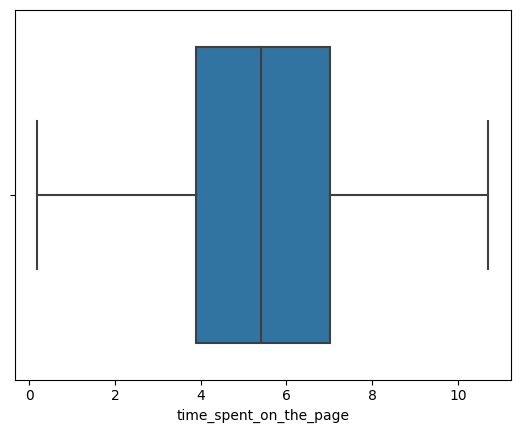

In [65]:
plt.figure(figsize= (20,5))
sns.histplot(data=enews,x='time_spent_on_the_page' );
plt.show()
sns.boxplot(data=enews,x='time_spent_on_the_page' );
plt.show()

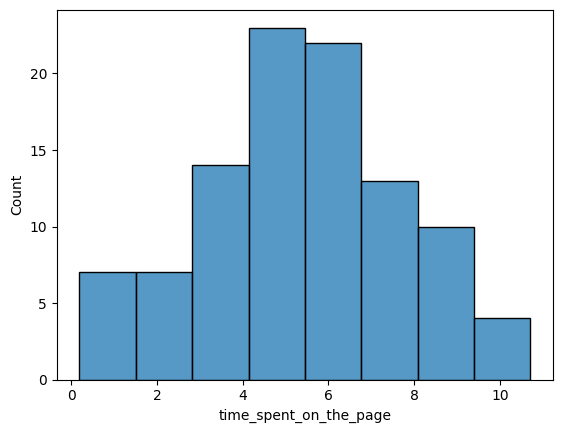

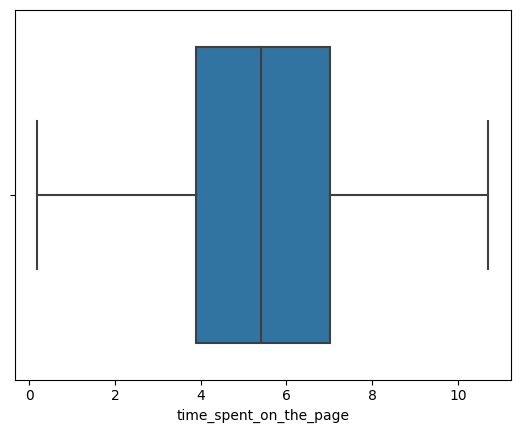

In [66]:
sns.histplot(data=enews,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=enews,x='time_spent_on_the_page')
plt.show()

#  Count by conversion

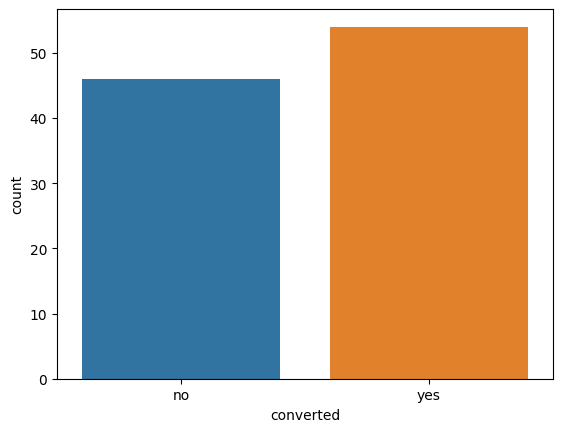

In [67]:
sns.countplot(data=enews,x='converted')
plt.show()

Count by Language prefered

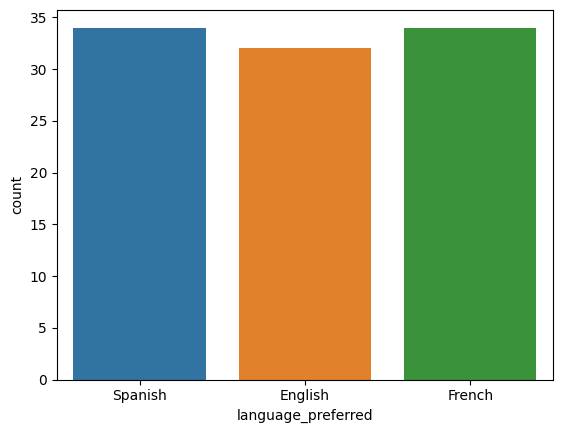

In [68]:
sns.countplot(data=enews,x='language_preferred')
plt.show()

### Bivariate Analysis

In [69]:
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


<Axes: xlabel='landing_page', ylabel='count'>

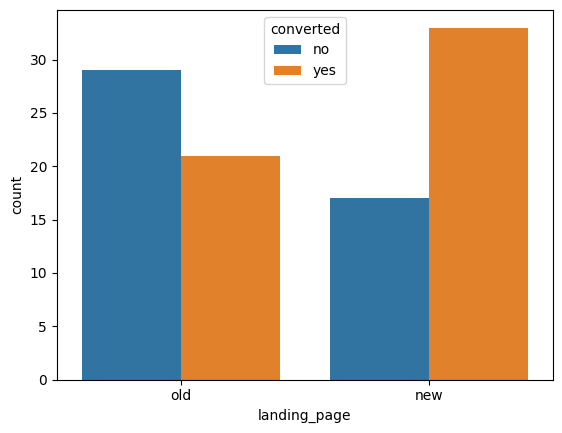

In [70]:
# Lannding page Vs Conversion
sns.countplot(data=enews, x='landing_page', hue='converted')

<Axes: xlabel='landing_page', ylabel='count'>

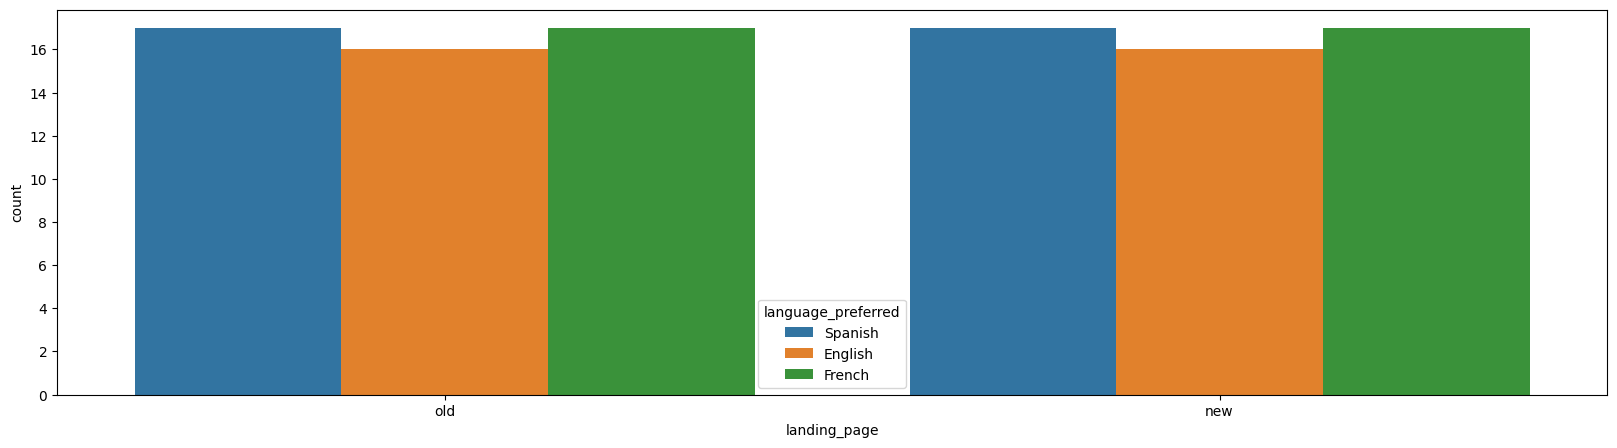

In [71]:
plt.figure(figsize= (20,5))
sns.countplot(data=enews, x='landing_page', hue='language_preferred')

**Conversion based on time spent**

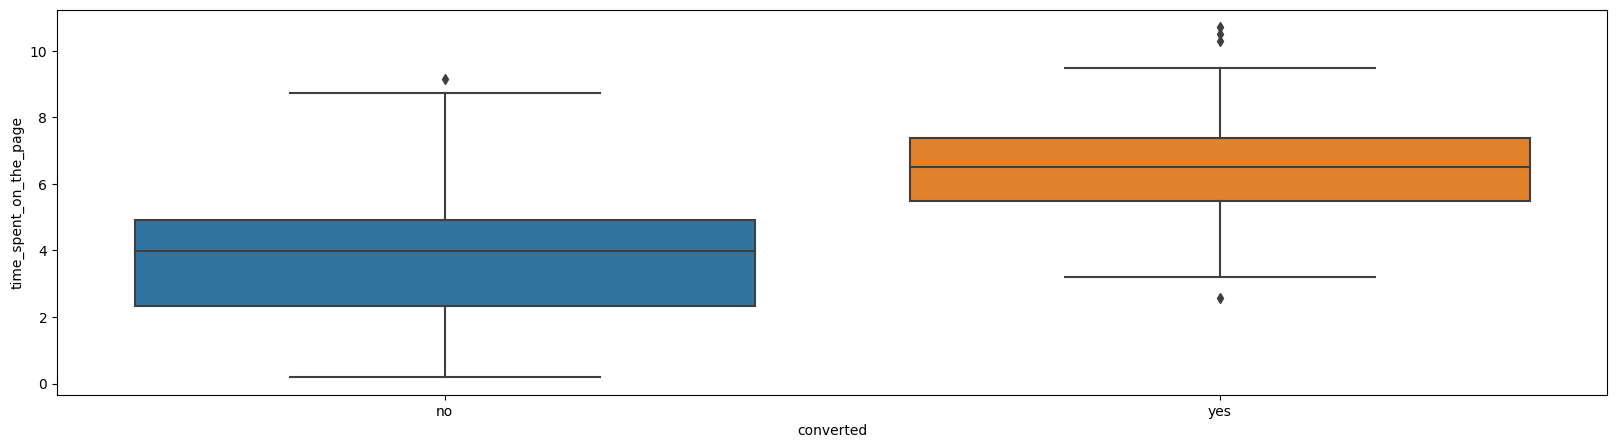

In [72]:
plt.figure(figsize= (20,5))
sns.boxplot(data=enews,x='converted',y='time_spent_on_the_page' );
plt.show()

**Language and Time spent relation**

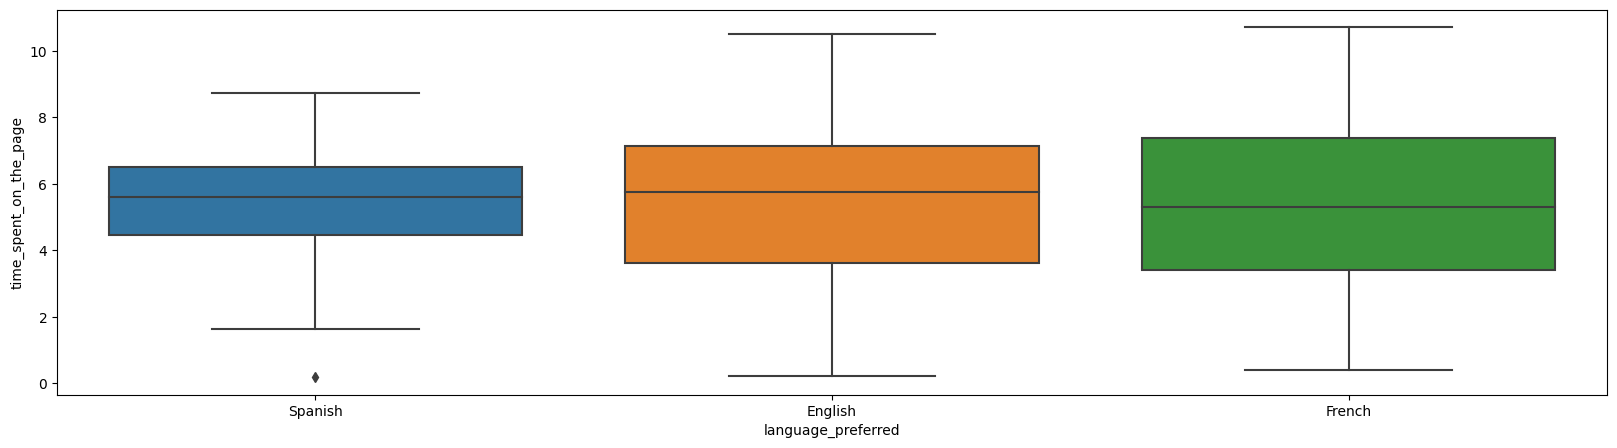

In [73]:
plt.figure(figsize= (20,5))
sns.boxplot(data=enews,x='language_preferred',y='time_spent_on_the_page' );
plt.show()

**Landing page and time spent relation**

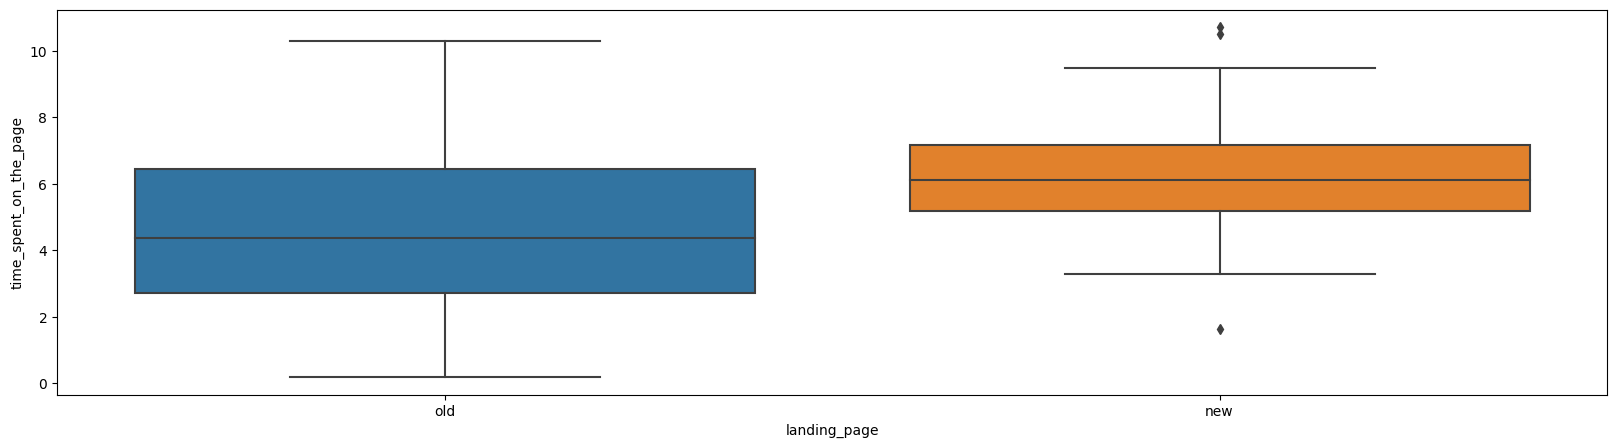

In [74]:
plt.figure(figsize= (20,5))
sns.boxplot(data=enews,x='landing_page',y='time_spent_on_the_page' );
plt.show()

<Figure size 2000x500 with 0 Axes>

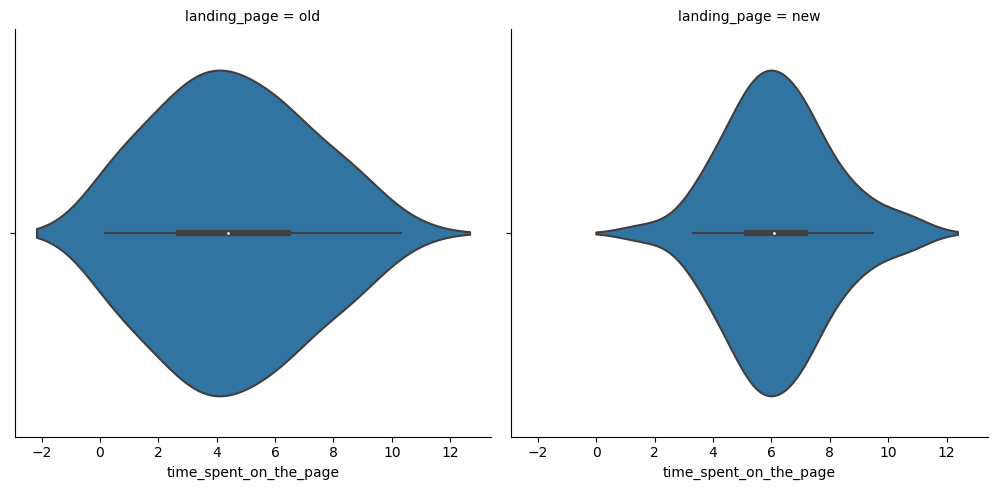

In [75]:
plt.figure(figsize= (20,5))
sns.catplot(data=enews,col='landing_page',x='time_spent_on_the_page', kind = "violin" ,col_wrap = 4);
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

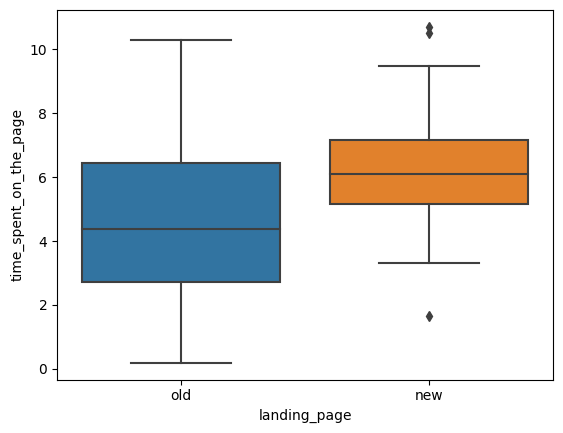

In [76]:
#Time spent by old page Vs new Page
sns.boxplot(data=enews,x='landing_page',y='time_spent_on_the_page' );

OBSERVATION: Yes, user spend more time on new landing page than old landing page.

### Step 1: Define the null and alternate hypothesis

**Null hypothesis:  User time spent on old landing page is greater than new landing (H0)**

**Alternate hypothesis:  User time spent on old landing page is NOT greater than new landing (H1)**


### Step 2: Select Appropriate test

**This is one tailed mean hypothesis from 2 independent populations based on Standard deviation.**

**Use ttest_ind -- carries out a t-test for the mean of two independent samples a and b.**


There are 2 populations: Old landing page and new landing page.
Baed mean
Unknown standard deviation
One tailed analysis
Z- Test appropriate in this case

###Step 3: Decide the significance level

In [77]:
alpha = .05

**Significance level is .05**


###Step 4: Collect and prepare data

In [78]:
# Create dataset with timespent for new landing page
dfnewtimespent = enews[enews['landing_page'] == 'new']['time_spent_on_the_page']
# Create dataset with timespent for old landing page
dfoldtimespent = enews[enews['landing_page'] == 'old'] ['time_spent_on_the_page'] 



In [79]:
print('Check standard deviation for the new page is:', round(dfnewtimespent.std(),2))
print('Check standard deviation for the new page :', round(dfoldtimespent.std(),2))

Check standard deviation for the new page is: 1.82
Check standard deviation for the new page : 2.58


### Step 5: Calculate the p-value

In [80]:
from scipy.stats import ttest_ind

#Calculate p-value
test_stat, p_value =  ttest_ind(dfnewtimespent, dfoldtimespent, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [81]:
print(' P Value : ' , p_value )
print(' Alpha : ' , alpha )
if p_value > alpha:
    print ( ' Can not reject null Hypothesis ')
else:
    print ( ' There is sufficient evidence to support alternate Hypothesis')

 P Value :  0.0001392381225166549
 Alpha :  0.05
 There is sufficient evidence to support alternate Hypothesis


### Step 7:  Draw inference

**User spend more time on new landing page than old landing page**



**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [82]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


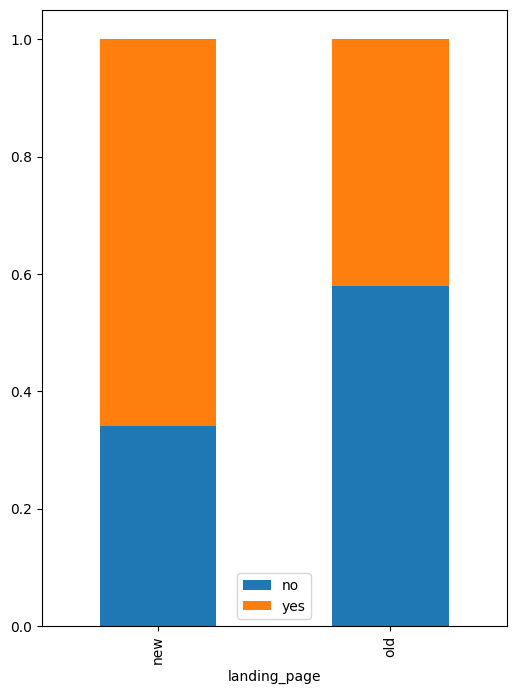

In [83]:
# Non numeric variables can be ploted using cross tab.
pd.crosstab(enews['landing_page'],enews['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

OBSERVATION: New landing page has more conversion rate than old landing page.

### Step 1: Define the null and alternate hypothesis
**Null Hypothesis:** The conversion rate for the old landing page is equal to or greater than the conversion rate for the new landing page.

**Alternate Hypothesis: ** The conversion rate for the new landing page is greater than the conversion rate for the old landing page

### Step 2: Select Appropriate test

 **There are 2 populations: Old landing page and new landing page.
 Based on mean
 Unknown standard deviation
 One tailed analysis
 Z- Test appropriate in this case**

### Step 3: Decide the significance level

In [84]:
alpha = 0.05

**Significance level is alpha = 0.05**

### Step 4: Collect and prepare data

In [85]:
# calculate the number of converted users in the treatment group
new_converted = enews[enews['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
new_converted = enews[enews['group'] == 'control']['converted'].value_counts()['yes']

n_control = enews.group.value_counts()['control'] # total number of users in the control group
n_treatment = enews.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [86]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [87]:
enews.shape

(100, 6)

**Number of users in new group**

In [88]:
dftreatment =  enews[enews['group'] == 'treatment']
dftreatment.shape


(50, 6)

**Number of users in old group**

In [89]:
dfcontrol =  enews[enews['group'] == 'control']
dfcontrol.shape

(50, 6)

**Number of users converted in Treatment group**

In [90]:
dftreatmentconverted = dftreatment[(dftreatment['converted']=='yes') ]
dftreatmentconverted.shape

(33, 6)

**Number of users converted in control group**

In [91]:
dfcontrolconverted = dfcontrol[(dfcontrol['converted']=='yes') ]
dfcontrolconverted.shape

(21, 6)

Total Sample : 100
old landing page : Total 50 records 21 converted (x1)
New landing page : Total 50 records 33 converted  (x2)



### Step 5: Calculate the p-value

In [92]:
from scipy.stats import norm
import math

In [93]:


n = 100
x1 = 21
x2 = 33

p0 = x1/n
p1= x2/n
alpha = .05

z = (p1 - p0) /math.sqrt(p0*(1-p0)/n)
 
p_value = 1- norm.cdf(z)

p_value
print('Null Hypothesis: The conversion ratio for old landing page is equal or greater than conversion ratio of new landing page. (H0)' )
print('The conversion ratio of new landing page is greater than conversion ratio of old landing page. (Ha)' )
print(' Sample count  (n) = ', n)
print(' Total conversion on old landing page (x1) = ', x1)
print(' Total conversion on new landing page (x1) = ', x2)



  


Null Hypothesis: The conversion ratio for old landing page is equal or greater than conversion ratio of new landing page. (H0)
The conversion ratio of new landing page is greater than conversion ratio of old landing page. (Ha)
 Sample count  (n) =  100
 Total conversion on old landing page (x1) =  21
 Total conversion on new landing page (x1) =  33


### Step 6: Compare the p-value with $\alpha$

In [94]:
print(' P Value : ' , p_value )
print(' Alpha : ' , alpha )
if p_value > alpha:
    print ( ' Can not reject null Hypothesis ')
else:
    print ( ' There is sufficient evidence to support alternate Hypothesis')

 P Value :  0.0016086687778761322
 Alpha :  0.05
 There is sufficient evidence to support alternate Hypothesis


### Step 7:  Draw inference

**Conversion rate is higher on new landing page than the old landing page.**



**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion and preferred language are independent or related?

In [95]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Perform Visual analysis

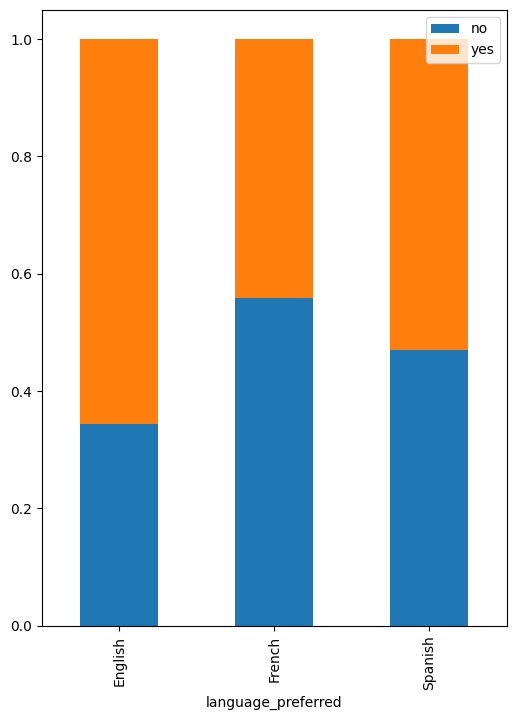

In [96]:
# Related Converted and preferred languages
pd.crosstab(enews['language_preferred'],enews['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

**H0 - Conversion is independent of preferred language.**
**H1 - Conversion is NOT independent of preferred language.**

### Step 2: Select appropriate test

**The appropriate test to define relationship between conversion and langauge is chi-test of independance.**

### Step 3: Decide the significance level

In [97]:
alpha = .05

**Signifinace level is 0.05**


### Step 4: Collect and prepare data

In [98]:
# Create contingency table
contingency_table = pd.crosstab(enews['language_preferred'],enews['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [99]:
from scipy.stats import chi2_contingency  

# calculate p-value
chi2, p_value, dof, expected = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p- value with alpha

In [100]:
print(' P Value : ' , p_value )
print(' Alpha : ' , alpha )
if p_value < alpha:
    print ( ' Reject null Hypothesis: Conversion is NOT Independent of preferred language ')
else:
    print ( ' Can not reject null hypothesis:  Conversion is Independent of preferred language')

 P Value :  0.2129888748754345
 Alpha :  0.05
 Can not reject null hypothesis:  Conversion is Independent of preferred language


### Step 7: Draw inference

Conversion proprotion is Independent of preferred language

## 4. Is the time spent on the new page same for the different language users?

### Visual analysis

In [101]:
# Create a new data set for new page records
enews_newpage = enews[enews['landing_page'] == 'new']
enews_newpage

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


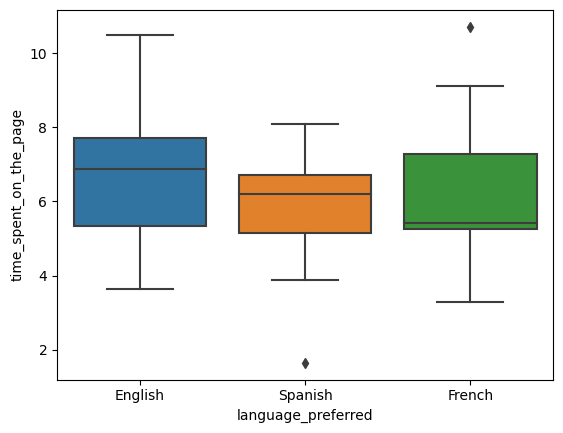

In [102]:
sns.boxplot(data=enews_newpage,x='language_preferred',y='time_spent_on_the_page' );


<Figure size 2000x500 with 0 Axes>

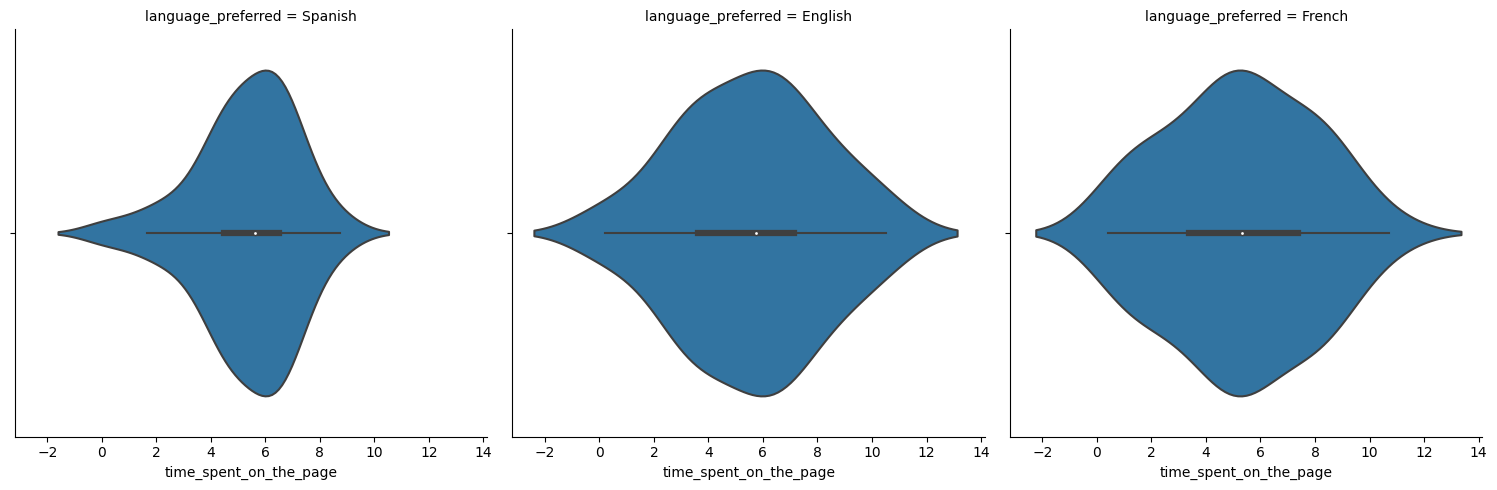

In [103]:
plt.figure(figsize= (20,5))
sns.catplot(data=enews,col='language_preferred',x='time_spent_on_the_page', kind = "violin" ,col_wrap = 4);
plt.show()

In [104]:
# lets look at the data
enews_newpage.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [105]:
enews_newpage.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

H0(Null): The mean time spent on the new page is the same for all language users.

H1(Alternate):The mean time spent on the new page is different for at least one pair of language users.

### Step 2: Select Appropriate test

**Use ANOVA test to compare means of 3 or more groups. In our case 3 langauge groups, English, French , Spanish.**


### Step 3: Decide the significance level

In [106]:
alpha = 0.05

Significance level considered is 0.05

### Step 4: Collect and prepare data

In [107]:
# Create 3 data sets for each language
English = enews_newpage[enews_newpage['language_preferred']=="English"]['time_spent_on_the_page']
French = enews_newpage[enews_newpage['language_preferred']=="French"]['time_spent_on_the_page']   
Spanish = enews_newpage[enews_newpage['language_preferred']=="Spanish"]['time_spent_on_the_page']   

In [108]:
English

1      7.13
16     8.73
22     3.65
23     7.02
25     4.39
26     9.49
30     5.41
43     7.16
44     3.91
49    10.50
51     5.65
72     5.08
73     7.46
86     6.71
91     8.47
99     5.86
Name: time_spent_on_the_page, dtype: float64

In [109]:
Spanish

2     4.40
4     4.75
12    5.86
15    6.27
24    6.18
38    1.65
42    7.16
47    7.23
48    8.08
52    6.47
54    6.41
68    6.70
77    3.88
82    5.74
95    5.15
97    7.07
98    6.20
Name: time_spent_on_the_page, dtype: float64

In [110]:
French

6      5.25
8     10.71
13     6.03
28     7.81
46     5.37
57     8.30
60     6.01
61     6.79
65     7.27
71     5.42
78     9.12
80     4.68
81     5.26
87     3.68
88     3.30
90     5.40
93     4.94
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [111]:
import scipy.stats as stats

# calculate p-value
f_value, p_value = stats.f_oneway(English,Spanish,French)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with alpha

In [112]:
print(' P Value : ' , p_value )
print(' Alpha : ' , alpha )
if p_value < alpha:
    print ( ' Reject null Hypothesis: The mean time spent on the new page is NOT same for all language users.')
else:
    print ( ' Can not reject null hypothesis:  The mean time spent on the new page is the same for all language users.')

 P Value :  0.43204138694325955
 Alpha :  0.05
 Can not reject null hypothesis:  The mean time spent on the new page is the same for all language users.


### Step 7:  Draw inference

** There is enough evidance to say that time spent on new page is same for different language users **


## Conclusion and Business Recommendations

**Conclusion:**
    
  **  1. Three languages are used by users. While English is main language there are singnificant number of users prefering Spanish and French too. Specific marketing targeting different language users will help. **

 **   2. User spend more time on new landing page than old landing page. New landing page can be made more user friendly, attractive by improving interface to keep users enganged for more time. **

 **   3. There is no evidence of users of perticular language spending more time on new page compared to other languages. By taking deeper look at the different language users hits, business can take better actions. **
    
 **   4. Conversion rate is higher on new landing page than the old landing page. **


___